In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Load the data
df = pd.read_excel("Market Research.xlsx")

In [3]:
# Display basic information about the dataset
df.info()
print("Number of null Values: ")
print(df.isna().sum())
print(f"Number of Duplicated Values: {df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country         9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9994 non-null   int64         
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [60]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'ProcessingDays'],
      dtype='object')

In [61]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [62]:
df.describe(include='object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,ProcessingDays
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,1,531,49,4,1862,3,17,1850,8
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,4 Days
freq,14,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48,2774


In [4]:
# Rename and drop unnecessary columns for clarity
new_df = df.drop(columns=['Row ID', 'Country']).rename(columns={
    'Order ID': 'OrderID',
    'Order Date': 'OrderDate',
    'Ship Date': 'ShipDate',
    'Ship Mode': 'ShipMode',
    'Customer ID': 'CustID',
    'Customer Name': 'CustName',
    'Postal Code': 'Postal',
    'Product ID': 'ProductID',
    'Sub-Category': 'SubCategory',
    'Product Name': 'ProductName'
})

In [5]:
# Calculate TotalCost and CostPerUnit
new_df['TotalCost'] = new_df['Sales'] - new_df['Profit']
new_df['CostPerUnit'] = new_df['TotalCost'] / new_df['Quantity']

In [6]:
# Group by Segment to analyze performance
seg_df = new_df.groupby(by='Segment').agg({
    'Profit': 'sum',
    'Sales': 'sum',
    'Quantity': 'sum',
    'TotalCost': 'sum'
}).sort_values(by=['Profit', 'Sales', 'Quantity'], ascending=False)

seg_df

,Profit,Sales,Quantity,TotalCost
Segment,,,,
Consumer,134119.2092,1.161401e+06,19521,1.027282e+06
Corporate,91979.1340,7.061464e+05,11608,6.141672e+05
Home Office,60298.6785,4.296531e+05,6744,3.693545e+05


In [7]:
# Group by City to analyze performance
city_df = new_df.groupby(by='City').agg({
    'Profit': 'sum',
    'Sales': 'sum',
    'Quantity': 'sum',
    'TotalCost': 'sum'
}).sort_values(by=['Profit', 'Sales', 'Quantity'], ascending=False)

city_df

,Profit,Sales,Quantity,TotalCost
City,,,,
New York City,62036.9837,256368.1610,3417,194331.1773
Los Angeles,30440.7579,175851.3410,2879,145410.5831
Seattle,29156.0967,119540.7420,1590,90384.6453
San Francisco,17507.3854,112669.0920,1935,95161.7066
Detroit,13181.7908,42446.9440,441,29265.1532
...,...,...,...,...
Chicago,-6654.5688,48539.5410,1132,55194.1098
Lancaster,-7239.0684,9891.4640,171,17130.5324
San Antonio,-7299.0502,21843.5280,247,29142.5782


In [8]:
# Group by ProductName, Category, and SubCategory
cpu_df = new_df.groupby(by=['ProductName', 'Category', 'SubCategory']).agg({
    'CostPerUnit': 'sum',
    'TotalCost': 'sum',
    'Quantity': 'sum'
}).sort_values(by=['CostPerUnit', 'Quantity', 'TotalCost'], ascending=False)

cpu_df

,,,CostPerUnit,TotalCost,Quantity
ProductName,Category,SubCategory,,,
Canon imageCLASS 2200 Advanced Copier,Technology,Copiers,9099.9740,36399.8960,20
Cubify CubeX 3D Printer Double Head Print,Technology,Machines,6659.9778,19979.9334,9
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,Office Supplies,Binders,6354.9500,19700.3450,31
GBC DocuBind TL300 Electric Binding System,Office Supplies,Binders,5229.4517,17589.9739,37
Martin Yale Chadless Opener Electric Letter Opener,Office Supplies,Supplies,4896.9228,17955.3836,22
...,...,...,...,...,...
Stockwell Gold Paper Clips,Office Supplies,Fasteners,1.8768,4.6920,5
OIC Thumb-Tacks,Office Supplies,Fasteners,1.8126,7.8546,13
Avery 484,Office Supplies,Labels,1.4688,5.8752,4


In [9]:
# Group by Category and City for further analysis
categ_city_df = new_df.groupby(by=['Category', 'City']).agg({
    'Profit': 'sum',
    'Quantity': 'sum',
    'TotalCost': 'sum'
}).sort_values(by=['Profit', 'TotalCost'], ascending=False)

categ_city_df

Profit  Quantity   TotalCost
Category        City                                           
Technology      New York City  36105.5058       632  73210.6002
Office Supplies New York City  20624.7864      2065  50736.2196
Technology      Los Angeles    13908.5379       603  59121.2481
Office Supplies Los Angeles    13460.6287      1688  35360.8853
Technology      Seattle        13031.8482       292  29474.5238
...                                   ...       ...         ...
Office Supplies San Antonio    -5689.9195       137   9976.5755
                Chicago        -6229.8294       700  20090.0534
Furniture       Philadelphia   -6827.1254       449  43322.6664
Technology      Lancaster      -6879.7098        24  12901.8868
Office Supplies Houston        -8108.9256       924  24478.4896

[1198 rows x 3 columns]

In [11]:
# Analyze top 50 profitable products
profit_df = new_df.sort_values(by=['Profit'], ascending=False).head(50)
profit_df

,OrderID,OrderDate,ShipDate,ShipMode,CustID,CustName,Segment,City,State,Postal,...,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit,ProcessingDays,TotalCost,CostPerUnit
6826,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,Lafayette,Indiana,47905,...,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760,7 Days,9099.9740,1819.9948
8153,CA-2017-140151,2017-03-23,2017-03-25,First Class,RB-19360,Raymond Buch,Consumer,Seattle,Washington,98115,...,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808,2 Days,7279.9792,1819.9948
4190,CA-2017-166709,2017-11-17,2017-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,Newark,Delaware,19711,...,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,5 Days,5459.9844,1819.9948
9039,CA-2016-117121,2016-12-17,2016-12-21,Standard Class,AB-10105,Adrian Barton,Consumer,Detroit,Michigan,48205,...,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740,13,0.0,4946.3700,4 Days,4946.3700,380.4900
4098,CA-2014-116904,2014-09-23,2014-09-28,Standard Class,SC-20095,Sanjit Chand,Consumer,Minneapolis,Minnesota,55407,...,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.950,5,0.0,4630.4755,5 Days,4819.4745,963.8949
2623,CA-2017-127180,2017-10-22,2017-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,New York City,New York,10024,...,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888,2 Days,7279.9792,1819.9948
509,CA-2015-145352,2015-03-16,2015-03-22,Standard Class,CM-12385,Christopher Martinez,Consumer,Atlanta,Georgia,30318,...,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,6354.950,5,0.0,3177.4750,6 Days,3177.4750,635.4950
8488,CA-2016-158841,2016-02-02,2016-02-04,Second Class,SE-20110,Sanjit Engle,Consumer,Arlington,Virginia,22204,...,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,8749.950,5,0.0,2799.9840,2 Days,5949.9660,1189.9932
7666,US-2016-140158,2016-10-04,2016-10-08,Standard Class,DR-12940,Daniel Raglin,Home Office,Providence,Rhode Island,2908,...,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,5399.910,9,0.0,2591.9568,4 Days,2807.9532,311.9948
6520,CA-2017-138289,2017-01-16,2017-01-18,Second Class,AR-10540,Andy Reiter,Consumer,Jackson,Michigan,49201,...,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,5443.960,4,0.0,2504.2216,2 Days,2939.7384,734.9346


In [12]:
# Add Year and Month columns based on OrderDate
new_df['Year'] = new_df['OrderDate'].dt.year
new_df['Month'] = new_df['OrderDate'].dt.month

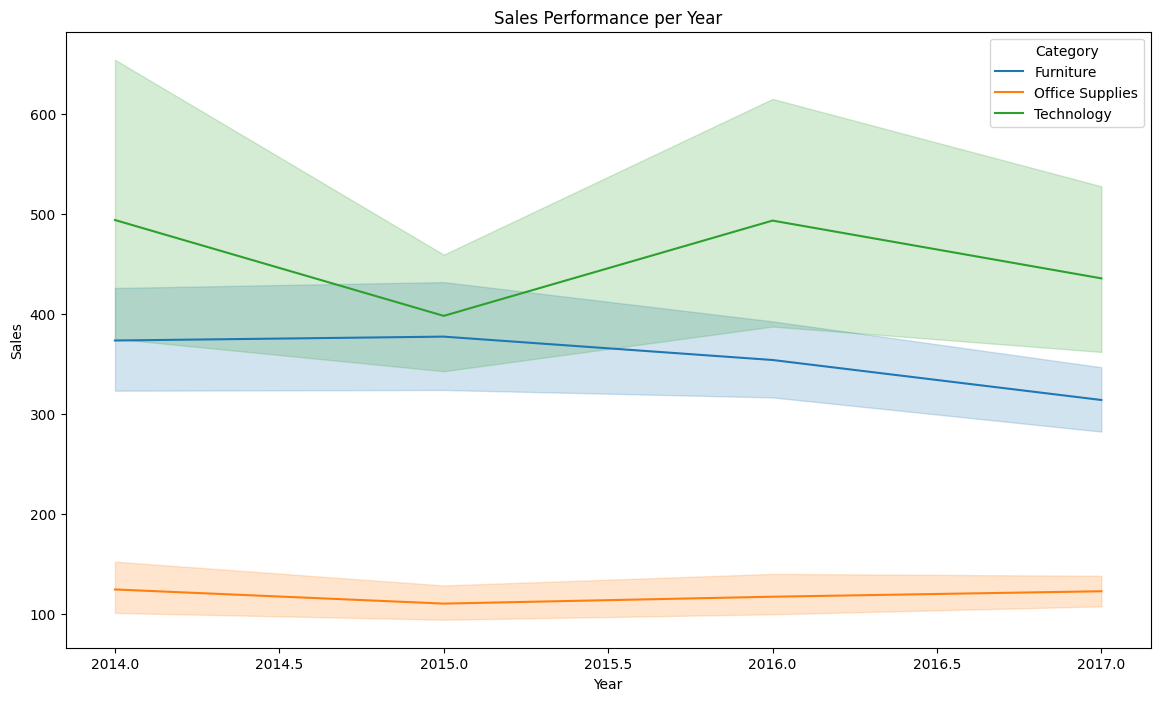

In [13]:
# Visualize Sales and Profit over time by Category
plt.figure(figsize=(14,8))
sns.lineplot(data=new_df, x='Year', y='Sales', hue='Category')
plt.title('Sales Performance per Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(title='Category')
plt.show()

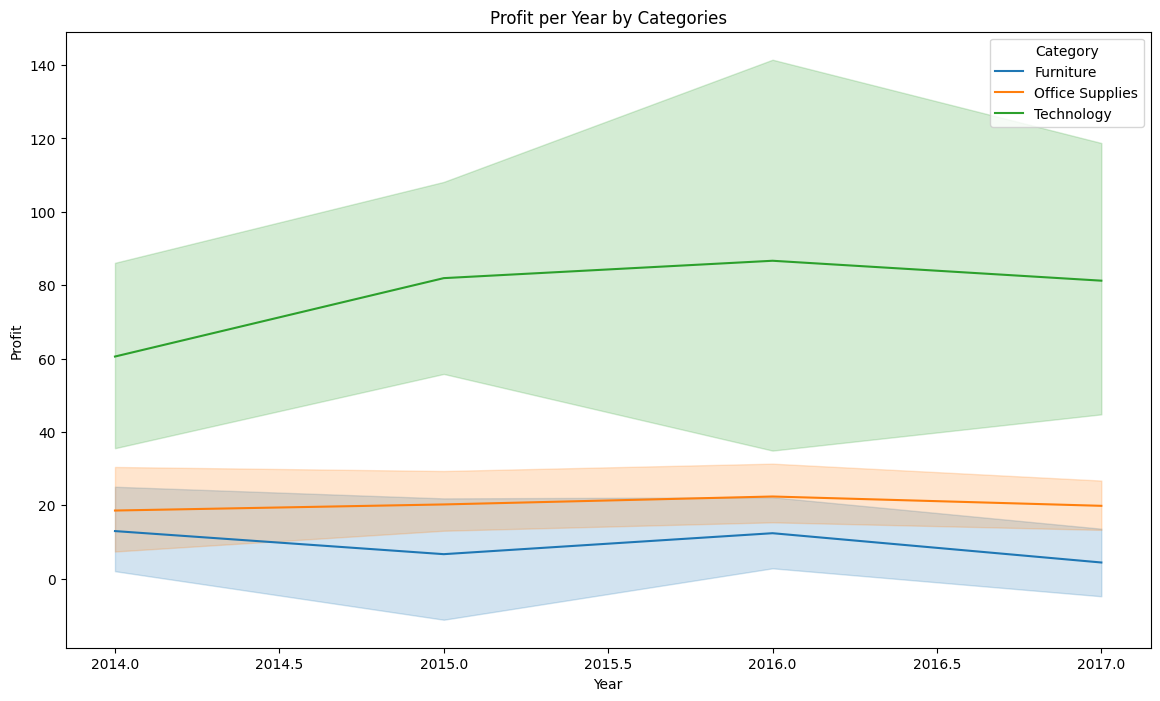

In [14]:
plt.figure(figsize=(14,8))
sns.lineplot(data=new_df, x='Year', y='Profit', hue='Category')
plt.title('Profit per Year by Categories')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.legend(title='Category')
plt.show()

In [15]:
# Analyze top 10 cities by Sales and Profit for each Category and Segment
grouped_df = new_df.groupby(['City', 'Category', 'Segment']).agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

grouped_df['Rank'] = grouped_df.groupby(['Category', 'Segment'])['Sales'].rank(method='first', ascending=False)
top10_cities = grouped_df[grouped_df['Rank'] <= 10].sort_values(by=['Category', 'Segment', 'Rank'])

C:\Users\rayha\AppData\Local\Temp\ipykernel_136040\3907477947.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sales', y='City', hue='Segment', data=top10_cities, ci=None)


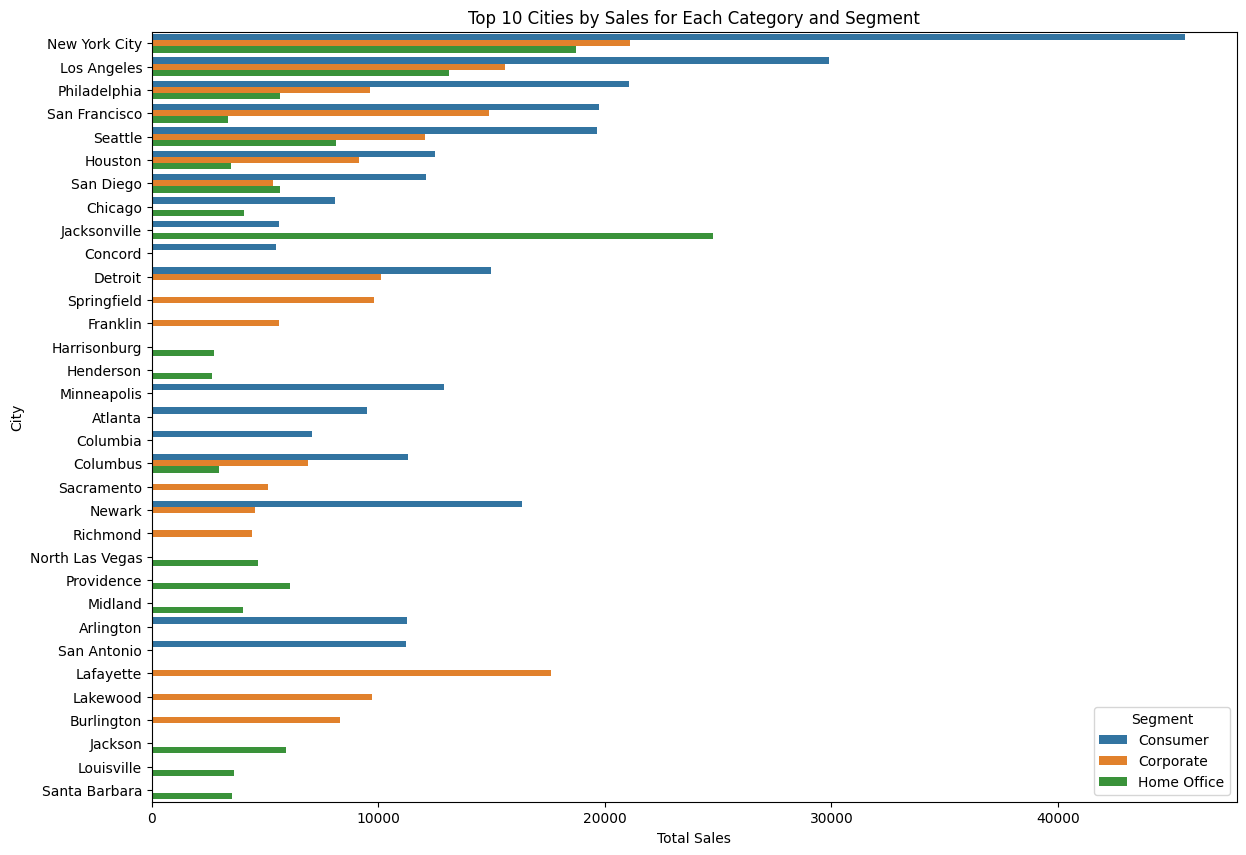

In [16]:
# Visualize top 10 cities by Sales
plt.figure(figsize=(14, 10))
sns.barplot(x='Sales', y='City', hue='Segment', data=top10_cities, ci=None)
plt.title('Top 10 Cities by Sales for Each Category and Segment')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.legend(title='Segment')
plt.show()

C:\Users\rayha\AppData\Local\Temp\ipykernel_136040\310895804.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[0], x='Sales', y='City', hue='Segment', data=top10_cities, ci=None)
C:\Users\rayha\AppData\Local\Temp\ipykernel_136040\310895804.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[1], x='Profit', y='City', hue='Segment', data=top10_cities, ci=None)


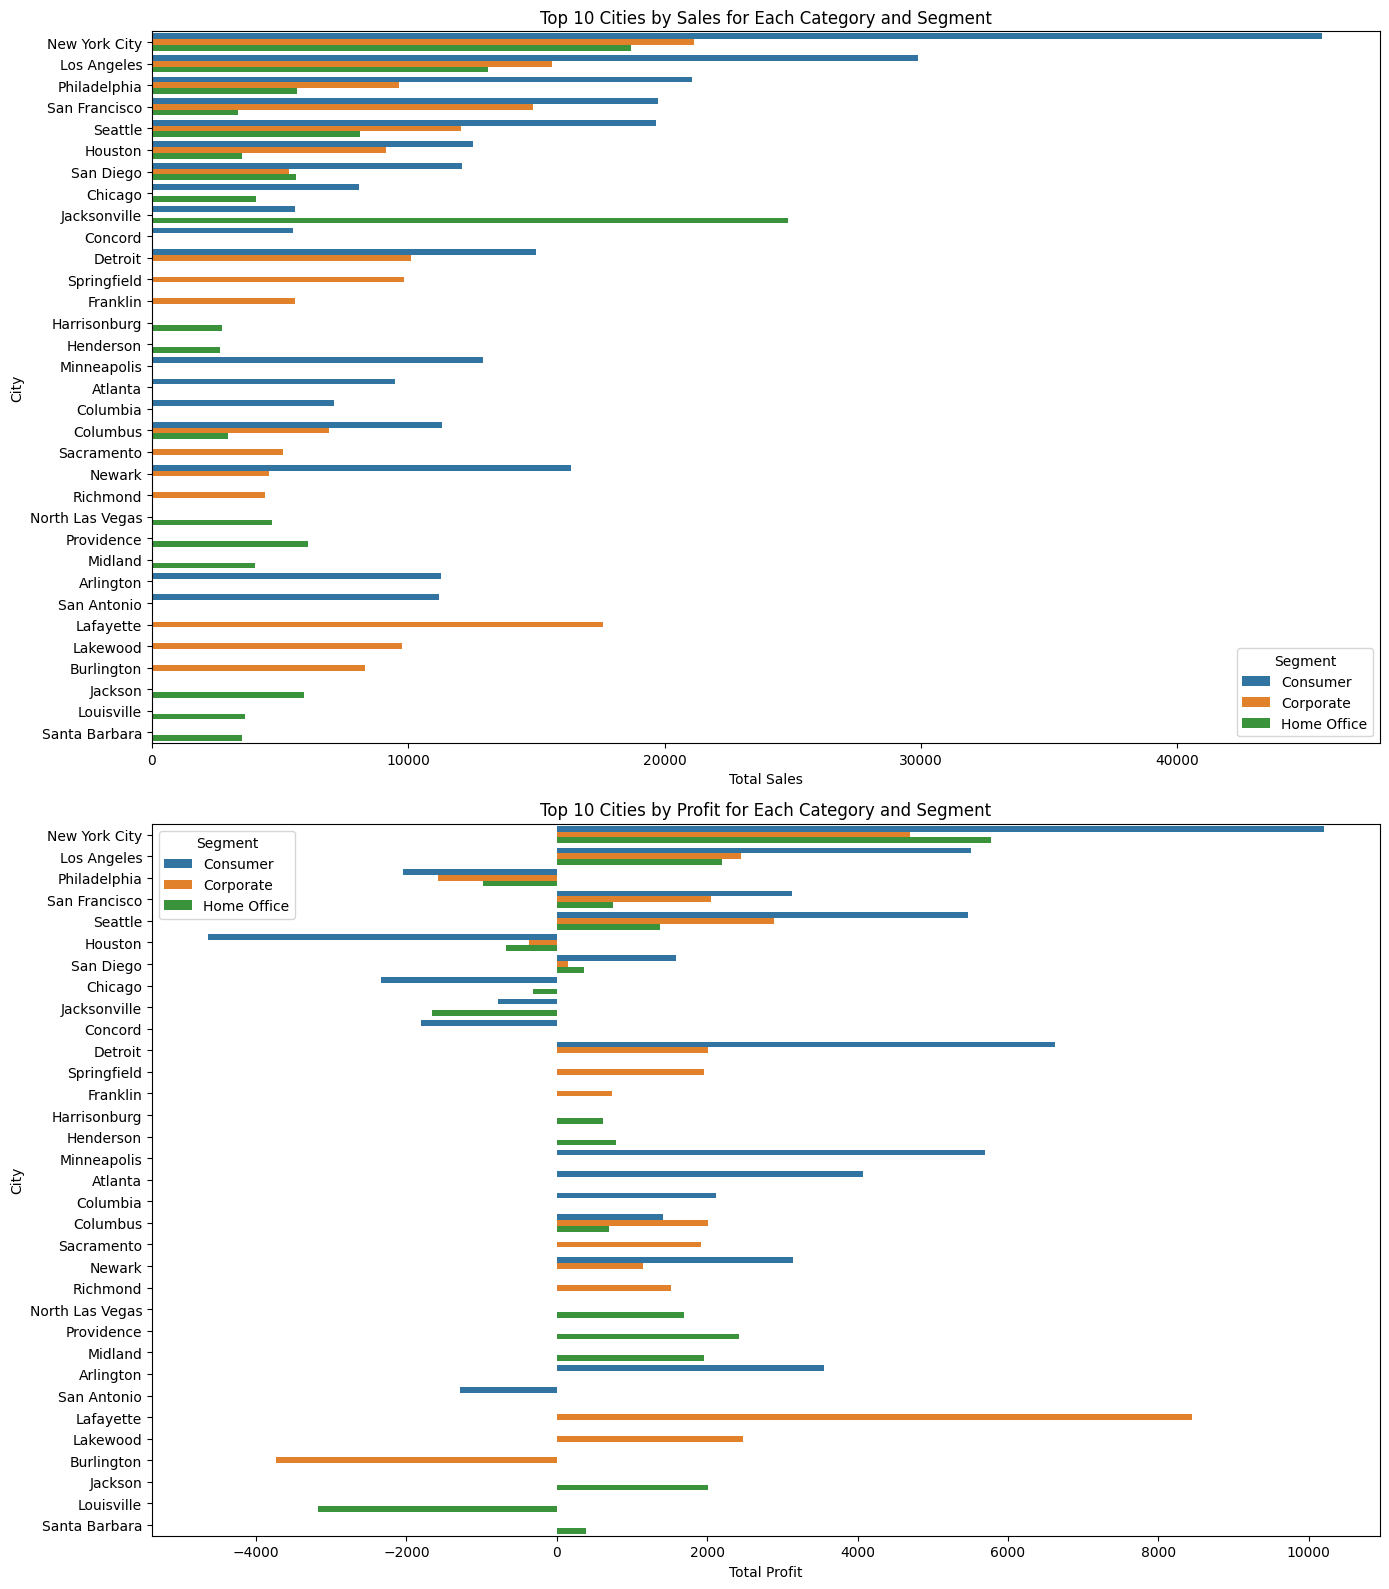

In [17]:
# Visualize top 10 cities by Sales and Profit
fig, axes = plt.subplots(2, 1, figsize=(14, 16))
sns.barplot(ax=axes[0], x='Sales', y='City', hue='Segment', data=top10_cities, ci=None)
axes[0].set_title('Top 10 Cities by Sales for Each Category and Segment')
axes[0].set_xlabel('Total Sales')
axes[0].set_ylabel('City')

sns.barplot(ax=axes[1], x='Profit', y='City', hue='Segment', data=top10_cities, ci=None)
axes[1].set_title('Top 10 Cities by Profit for Each Category and Segment')
axes[1].set_xlabel('Total Profit')
axes[1].set_ylabel('City')

plt.tight_layout()
plt.show()

In [18]:
# Encode categorical features for modeling
encode = LabelEncoder()
object_coll = new_df.select_dtypes(include='object').columns

for col in object_coll:
    new_df[col] = encode.fit_transform(new_df[col])

C:\Users\rayha\AppData\Local\Temp\ipykernel_136040\155288105.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_corr.index, y=profit_corr.values, palette='coolwarm')


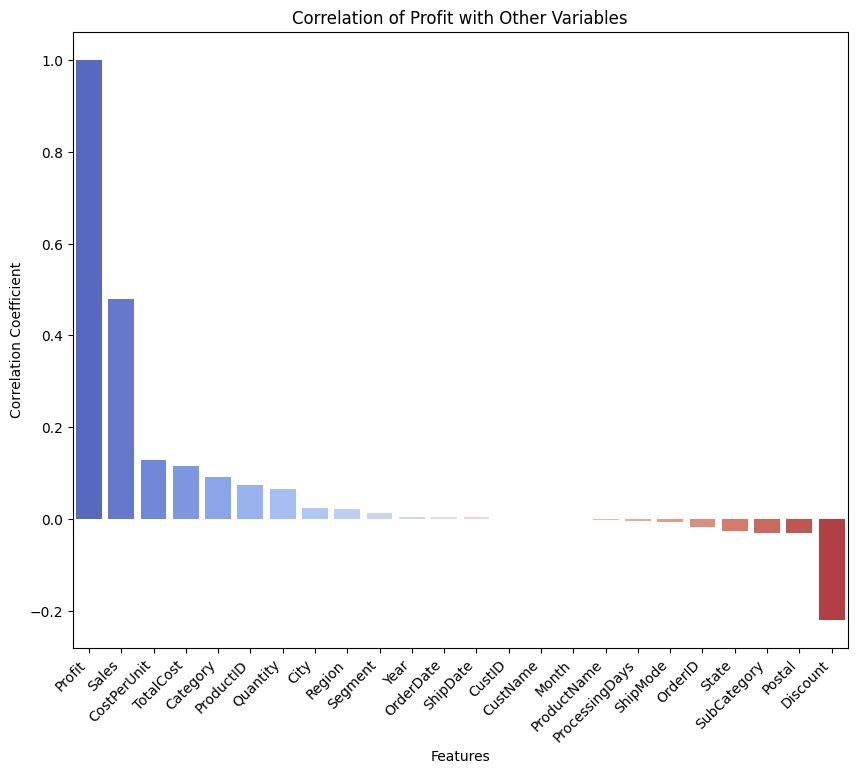

In [19]:
# Analyze correlations with Profit
profit_corr = new_df.corr()['Profit'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=profit_corr.index, y=profit_corr.values, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Correlation of Profit with Other Variables')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

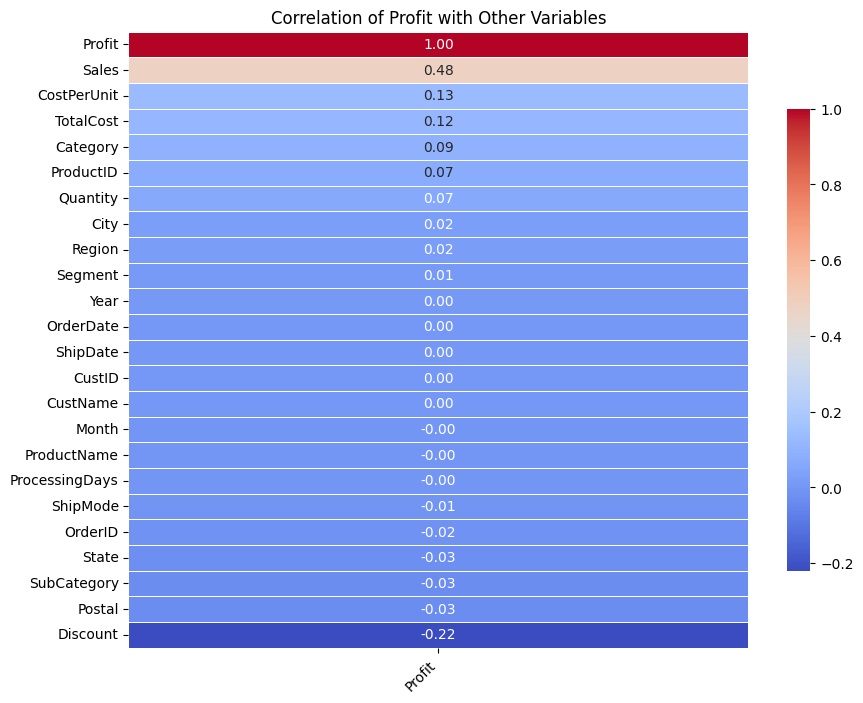

In [20]:
profit_corr_df = new_df.corr()[['Profit']].sort_values(by='Profit', ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(data=profit_corr_df, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', 
            annot_kws={"size": 10}, cbar_kws={'shrink': 0.75})
plt.xticks(rotation=45, ha='right')
plt.title('Correlation of Profit with Other Variables')
plt.show()

In [21]:
# Prepare data for model training
scaler = MinMaxScaler()

X = new_df[['Category', 'City', 'Region', 'Segment', 'SubCategory']]
y = (new_df['Profit'] > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [22]:
# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.82


In [24]:
# Compare actual vs predicted results
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

comparison_df = pd.concat([pd.DataFrame(X_test_scaled, columns=X_test.columns), comparison_df.reset_index(drop=True)], axis=1)
comparison_df['Difference'] = comparison_df['Actual'] - comparison_df['Predicted']
print(comparison_df.head())

   Category      City    Region  Segment  SubCategory  Actual  Predicted  \
0       0.5  0.448015  0.666667      0.5       0.8750       1          1   
1       0.5  0.826087  1.000000      0.0       0.1875       1          1   
2       0.0  0.875236  0.000000      0.5       0.5625       1          1   
3       0.0  0.389414  0.000000      1.0       0.3125       0          1   
4       0.0  0.500945  1.000000      0.0       1.0000       0          1   

   Difference  
0           0  
1           0  
2           0  
3          -1  
4          -1  


In [25]:
# Analyze where the model made errors
errors_df = comparison_df[comparison_df['Difference'] != 0]
print(errors_df)

      Category      City    Region  Segment  SubCategory  Actual  Predicted  \
3          0.0  0.389414  0.000000      1.0       0.3125       0          1   
4          0.0  0.500945  1.000000      0.0       1.0000       0          1   
6          1.0  0.705104  0.333333      0.5       0.8125       0          1   
8          0.5  0.682420  1.000000      0.5       0.1875       0          1   
10         0.5  0.389414  0.000000      0.0       0.1875       0          1   
...        ...       ...       ...      ...          ...     ...        ...   
1979       0.5  0.389414  0.000000      0.0       0.1875       0          1   
1982       1.0  0.175803  0.333333      0.0       0.6875       0          1   
1986       0.0  0.389414  0.000000      0.5       0.3125       0          1   
1988       1.0  0.555766  0.666667      0.0       0.0000       0          1   
1998       0.0  0.705104  0.333333      1.0       0.2500       0          1   

      Difference  
3             -1  
4            

In [103]:
comparison_df.shape

(1999, 8)

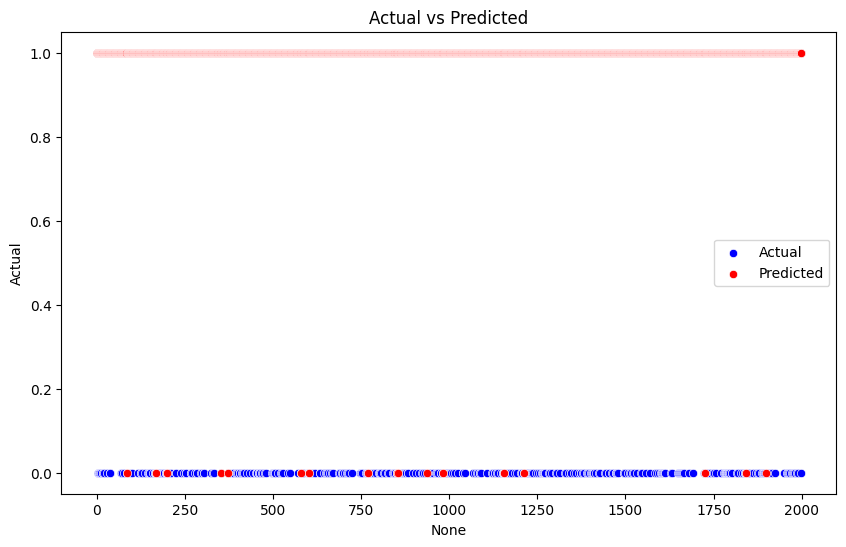

In [26]:
# Visualize actual vs predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=comparison_df.index, y='Actual', data=comparison_df, label='Actual', color='blue')
sns.scatterplot(x=comparison_df.index, y='Predicted', data=comparison_df, label='Predicted', color='red')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# List of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [29]:
# Initialize a dataframe to store the accuracy results
results = pd.DataFrame(columns=['Model', 'Accuracy'])

# Loop through each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the result in the dataframe
    new_row = pd.DataFrame({'Model': [name], 'Accuracy': [accuracy]})
    results = pd.concat([results, new_row], ignore_index=True)

# Display the results
print(results)

C:\Users\rayha\AppData\Local\Temp\ipykernel_136040\2140225706.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


                 Model  Accuracy
0  Logistic Regression  0.816908
1  K-Nearest Neighbors  0.878439
2        Decision Tree  0.898949
3        Random Forest  0.900950
4    Gradient Boosting  0.893447


In [30]:
# Perform cross-validation to further validate the results
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f'{name} Cross-Validation Accuracy: {np.mean(cv_scores):.2f} (+/- {np.std(cv_scores):.2f})')

Logistic Regression Cross-Validation Accuracy: 0.81 (+/- 0.00)
K-Nearest Neighbors Cross-Validation Accuracy: 0.86 (+/- 0.01)
Decision Tree Cross-Validation Accuracy: 0.89 (+/- 0.01)
Random Forest Cross-Validation Accuracy: 0.89 (+/- 0.01)
Gradient Boosting Cross-Validation Accuracy: 0.88 (+/- 0.01)


In [31]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=rf_param_grid, 
                              cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search
rf_grid_search.fit(X_train_scaled, y_train)

# Display the best parameters and best accuracy
print(f'Best Random Forest Parameters: {rf_grid_search.best_params_}')
print(f'Best Random Forest Cross-Validation Accuracy: {rf_grid_search.best_score_:.2f}')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Random Forest Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Random Forest Cross-Validation Accuracy: 0.89


In [32]:
# Hyperparameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for Gradient Boosting
gb_grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                              param_grid=gb_param_grid, 
                              cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search
gb_grid_search.fit(X_train_scaled, y_train)

# Display the best parameters and best accuracy
print(f'Best Gradient Boosting Parameters: {gb_grid_search.best_params_}')
print(f'Best Gradient Boosting Cross-Validation Accuracy: {gb_grid_search.best_score_:.2f}')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Gradient Boosting Cross-Validation Accuracy: 0.91


In [34]:
# Train the final Random Forest model with the best hyperparameters
final_rf_model = RandomForestClassifier(
    bootstrap=True, 
    max_depth=20, 
    min_samples_leaf=1, 
    min_samples_split=5, 
    n_estimators=100,
    random_state=42
)
final_rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, random_state=42)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Predict with Random Forest
rf_y_pred = final_rf_model.predict(X_test_scaled)

In [37]:
# Evaluate Random Forest Model
print("Random Forest Classification Report")
print(classification_report(y_test, rf_y_pred))

print("Random Forest Confusion Matrix")
print(confusion_matrix(y_test, rf_y_pred))

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       377
           1       0.93      0.96      0.94      1622

    accuracy                           0.90      1999
   macro avg       0.85      0.81      0.83      1999
weighted avg       0.90      0.90      0.90      1999

Random Forest Confusion Matrix
[[ 252  125]
 [  70 1552]]


In [35]:

# Train the final Gradient Boosting model with the best hyperparameters
final_gb_model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=5,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)
final_gb_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=200, random_state=42)

In [38]:
# Predict with Gradient Boosting
gb_y_pred = final_gb_model.predict(X_test_scaled)

In [39]:
# Evaluate Gradient Boosting Model
print("Gradient Boosting Classification Report")
print(classification_report(y_test, gb_y_pred))

print("Gradient Boosting Confusion Matrix")
print(confusion_matrix(y_test, gb_y_pred))

Gradient Boosting Classification Report
              precision    recall  f1-score   support

           0       0.81      0.66      0.73       377
           1       0.92      0.96      0.94      1622

    accuracy                           0.91      1999
   macro avg       0.87      0.81      0.83      1999
weighted avg       0.90      0.91      0.90      1999

Gradient Boosting Confusion Matrix
[[ 248  129]
 [  58 1564]]


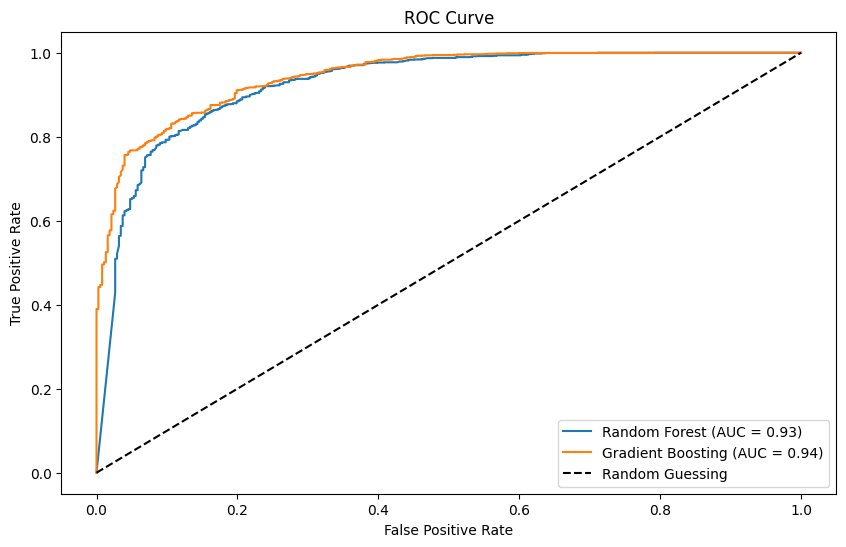

In [40]:
# Plot ROC Curve for both models
rf_fpr, rf_tpr, _ = roc_curve(y_test, final_rf_model.predict_proba(X_test_scaled)[:,1])
gb_fpr, gb_tpr, _ = roc_curve(y_test, final_gb_model.predict_proba(X_test_scaled)[:,1])

plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {auc(rf_fpr, rf_tpr):.2f})')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {auc(gb_fpr, gb_tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [41]:
import joblib

# Save the Random Forest model
joblib.dump(final_rf_model, 'Random_Forest_Model.pkl')

# Save the Gradient Boosting model
joblib.dump(final_gb_model, 'Gradient_Boosting_Model.pkl')

['Gradient_Boosting_Model.pkl']